<center> <h3> DS 3500 — Fall 2021</h3> </center>
<center><h1> Natural Language Processing and Supervised Machine Learning Methods to Predict Stock Price Change from Earnings Call Transcripts </h1></center> 
<center><h4>  By: Qi Li, Kelly Phalen, Marco Tortolani, Emily Wang, Xinyu Wu </h4></center> 

## Outline
[1. PDFCleaner](#1.-PDFCleaner)

[2. StockPuller](#2.-StockPuller)

[3. PerformanceTester](#3.-PerformanceTester)

[4. Transcripts](#4.-Transcripts)

[5. Database](#5.-Database)

[6. Vectorizers](#6.-Vectorizers)

[7. Principal Component Analysis](#7.-Principal-Component-Analysis)

[8. Base Models](#8.-Base-Models)

[9. Hyperparameter Tuning](#9.-Hyperparameter-Tuning)

[10. Cross-Validation](#10.-Cross-Validation)

[11. Model Performance](#11.-Model-Performance)

## 1. PDFCleaner

In [6]:

file = "transcripts/SBUX_transcripts/20211028_Starbucks_Corp-_Earnings_Call_2021-10-28_DN000000002966775416.pdf"
single_ticker = 'SBUX'
date = '20211028'
path_to_project = "C:/Users/mtort/Repositories/DS3500-Final-Project"


In [7]:
from PdfCleaner import PdfCleaner

cleaner = PdfCleaner(file)
cleaned_text=cleaner.clean_stopwords_punctuation()
# origin.print_cleanedText()
print(cleaner.lenBeforeClean())
print(cleaner.lenAfterClean())

72103
49810


## 2. StockPuller

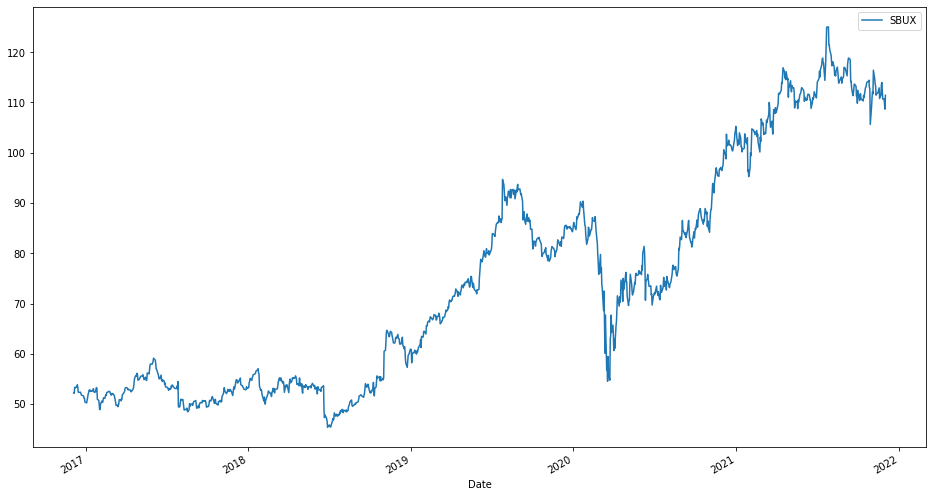

0.07231066878704784


In [8]:
from StockPuller import StockPuller

Puller = StockPuller()
Puller.plotStock(single_ticker)
print(Puller.changeOverDays(single_ticker, date, 1))




## 3. PerformanceTester

In [9]:
from PerformanceTesting import PerformanceTester

Tester = PerformanceTester()
articles = [[single_ticker, date, cleaned_text]]
Tester.loadArticles(articles)
Tester.setTimeframe('day', 1)
xy = Tester.aquireTargetValues()
X = xy[0]
y = xy[1]
print('This is the text in list format to input into the model: \n', [text[:1000] for text in X], '\n\n\n', 
        'This is the classification in list format (1 for positive movement 0 for negative movement):', y)


This is the text in list format to input into the model: 
 ['Company Name Starbucks Corp Company Ticker SBUX US Equity Date 20211028 Q4 2021 Earnings Call Company Participants Greg Smith Vice President Investor Relations L John Culver Group President North America Chief Operating Oﬃcer A N Kevin Johnson President Chief Executive Oﬃcer I F Leo Tsoi Chairman Chief Executive Oﬃcer Starbucks China Rachel Ruggeri Chief Financial Oﬃcer Unidentiﬁed Speaker Other Participants Andrew Charles David Tarantino Jeﬀrey Bernstein Analyst John Glass John Ivankoe John Tower Analyst Sara Senatore Sharon Zackﬁa t Unidentiﬁed Participant p r c Presentation s n Operator r T Good afternoon My Alex I conference operator today g I like welcome Starbucks Fourth Quarter Fiscal Year End 2021 r e Conference Call b m All lines placed mute prevent background noise After speakers remarks questionandanswer session Operator Instructions o o I turn Greg Smith Vice President Investor Relations Mr Smith l B begin confere

## 4. Transcripts

In [10]:
from store_transcripts import Transcripts


#load starbucks
store = Transcripts(single_ticker)
# remove if path is hard coded
store.path = path_to_project+"/transcripts/"+single_ticker+"_transcripts/"
transcripts = store.create_dct()
print(transcripts[0]['transcript'][:1000])


Company Name Starbucks Corp Company Ticker SBUX US Equity Date  Q  Earnings Call Company Participants Greg Smith Vice President Investor Relations L John Culver Group President North America Chief Operating Oﬃcer A N Kevin Johnson President Chief Executive Oﬃcer I F Leo Tsoi Chairman Chief Executive Oﬃcer Starbucks China Rachel Ruggeri Chief Financial Oﬃcer Unidentiﬁed Speaker Other Participants Andrew Charles David Tarantino Jeﬀrey Bernstein Analyst John Glass John Ivankoe John Tower Analyst Sara Senatore Sharon Zackﬁa t Unidentiﬁed Participant p r c Presentation s n Operator r T Good afternoon My Alex I conference operator today g I like welcome Starbucks Fourth Quarter Fiscal Year End  r e Conference Call b m All lines placed mute prevent background noise After speakers remarks questionandanswer session Operator Instructions o o I turn Greg Smith Vice President Investor Relations Mr Smith l B begin conference Greg Smith BIO  GO Good afternoon everyone thank joining today discuss Sta

## 5. Database

In [15]:
from store_transcripts import Database
from pymongo import MongoClient

#insert starbucks into starbucks_transcripts schema
Base = Database()
Base.db = MongoClient().starbucks_transcripts
Base.store_data([single_ticker])

SBUX transcripts stored successfully


Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'starbucks_transcripts')

### Import Transcripts for Top 20 NASDAQ Companies by Market Cap

In [17]:

''' To prevent "IOPub data rate exceeded error":
enter into terminal: jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10 '''

# tickers = ['AAPL', 'ADBE', 'AMZN', 'ASML', 'AVGO', 'CMCSA', 'COST',  'CSCO', 'FB', 'GOOGL',
#            'INTC', 'MSFT', 'NFLX', 'NVDA', 'PDD', 'PEP', 'PYPL', 'TMUS', 'TSLA', 'TXN']

tickers = ['AAPL', 'ADBE', 'AMZN', 'ASML', 'AVGO']
#for quick running
database = Database()
db = database.store_data(tickers)

                          Earnings Transcript C:/Users/mtort/Repositories/DS3500-Final-Project/transcripts/AAPL_transcripts/20161025_Apple_Inc-_Earnings_Call_2016-10-25_FS000000002309526172.pdf Not Added
                          
                          Earnings Transcript C:/Users/mtort/Repositories/DS3500-Final-Project/transcripts/AAPL_transcripts/20161025_Apple_Inc-_Earnings_Call_2016-10-25_FS000000002309526178.pdf Not Added
                          
AAPL transcripts stored successfully
ADBE transcripts stored successfully
                          Earnings Transcript C:/Users/mtort/Repositories/DS3500-Final-Project/transcripts/AMZN_transcripts/20190426_Amazon.com_Inc-_Earnings_Call_2019-4-25_DN000000002663104261.pdf Not Added
                          
AMZN transcripts stored successfully
ASML transcripts stored successfully


## 6. Vectorizers

In [13]:
from vector_and_pca import Vectorizer

Creator = Vectorizer()
data, text = Creator.query_data()
tfidf_df, bag_of_words = Creator.tfidf(text)

KeyboardInterrupt: 

## 7. Principal Component Analysis

In [ ]:
data, text = Creator.query_data()
tfidf_df, bag_of_words = Creator.tfidf(text)

pca_df = Creator.pca_df(bag_of_words)
pca_df

,aaa,aapl,aaron,ab,abandon,abandoned,abandonment,abate,abatement,abating,...,ﬂuctuates,ﬂuctuation,ﬂuctuations,ﬂuid,ﬂuidity,ﬂush,ﬂux,ﬂy,ﬂying,ﬂywheel
0,0.0,0.180664,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.165782,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.007406,0.009567,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.104560,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.104032,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.182241,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
544,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
545,0.0,0.000000,0.027292,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
546,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


## 8. Base Models

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

### Dictionary of ML Algorithms

In [ ]:
estimators = {
            'Logistic Regression' : LogisticRegression(), 
            'Support Vector Machine': LinearSVC(max_iter=1000000),
            'Gaussian Naive Bayes': GaussianNB(),
            'Decision Tree': DecisionTreeClassifier()}
parameters = ['Base', 'Cross-Validated GridSearch', 'KFold Cross-Validation']

### Create Empty Dataframe to Store Performance Metrics

In [ ]:
from modeling_eval import Modeling
Modeler = Modeling()
print(Modeler.estimators)
print(Modeler.parameters)
pca_metric = Modeler.metrics_df()

### Use Predefined Columns and Rows to Initialize Empty Dataset for Evaluation Metrics

Base                         \
                       Logistic Regression Support Vector Machine   
0            precision                   0                      0   
             recall                      0                      0   
             f1-score                    0                      0   
             support                     0                      0   
1            precision                   0                      0   
             recall                      0                      0   
             f1-score                    0                      0   
             support                     0                      0   
all          accuracy                    0                      0   
macro avg    precision                   0                      0   
             recall                      0                      0   
             f1-score                    0                      0   
             support                     0                      0   
weighted avg precision                   0                      0   
             recall                      0                      0   
             f1-score                    0                      0   
             support                     0                      0   

                                                           \
                       Gaussian Naive Bayes Decision Tree   
0            precision                    0             0   
             recall                       0             0   
             f1-score                     0             0   
             support                      0             0   
1            precision                    0             0   
             recall                       0             0   
             f1-score                     0             0   
             support                      0             0   
all          accuracy                     0             0   
macro avg    precision                    0             0   
             recall                       0             0   
             f1-score                     0             0   
             support                      0             0   
weighted avg precision                    0             0   
             recall                       0             0   
             f1-score                     0             0   
             support                      0             0   

                       Cross-Validated GridSearch                         \
                              Logistic Regression Support Vector Machine   
0            precision                          0                      0   
             recall                             0                      0   
             f1-score                           0                      0   
             support                            0                      0   
1            precision                          0                      0   
             recall                             0                      0   
             f1-score                           0                      0   
             support                            0                      0   
all          accuracy                           0                      0   
macro avg    precision                          0                      0   
             recall                             0                      0   
             f1-score                           0                      0   
             support                            0                      0   
weighted avg precision                          0                      0   
             recall                             0                      0   
             f1-score                           0                      0   
             support                            0                      0   

                                                           \
                       Gaussian Naive Bayes Decision Tree   

### Function to Add Evaluation Scores to Performance Dataframe

In [ ]:
Modeler.base_models(pca_df)

/Users/xinyuwu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/xinyuwu/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Logistic Regression :
Prediction accuracy on the test data: 63.50% 

Prediction accuracy on the test data: 87.83% 

Support Vector Machine :
Prediction accuracy on the test data: 65.69% 

Prediction accuracy on the test data: 87.10% 

Gaussian Naive Bayes :
Prediction accuracy on the test data: 66.42% 

Prediction accuracy on the test data: 71.78% 

Decision Tree :
Prediction accuracy on the test data: 65.69% 

Prediction accuracy on the test data: 100.00% 



/Users/xinyuwu/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/xinyuwu/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/xinyuwu/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

## 9. Hyperparameter Tuning

## 10. Cross-Validation

In [ ]:
# from sklearn.model_selection import KFold
# from sklearn.model_selection import cross_val_score
Creator.cross_validation(pca_df)

/Users/xinyuwu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression :
Prediction accuracy on the training data: 87.83
Prediction accuracy on the test data: 63.50% 

Support Vector Machine :
Prediction accuracy on the training data: 87.10
Prediction accuracy on the test data: 65.69% 

Gaussian Naive Bayes :
Prediction accuracy on the training data: 71.78
Prediction accuracy on the test data: 66.42% 

Decision Tree :
Prediction accuracy on the training data: 100.00
Prediction accuracy on the test data: 63.50% 



# 11. Model Performance

In [ ]:
Modeler.performance

Base                         \
                       Logistic Regression Support Vector Machine   
0            precision            0.623377               0.637500   
             recall               0.695652               0.739130   
             f1-score             0.657534               0.684564   
             support             69.000000              69.000000   
1            precision            0.650000               0.684211   
             recall               0.573529               0.573529   
             f1-score             0.609375               0.624000   
             support             68.000000              68.000000   
all          accuracy             0.635036               0.656934   
macro avg    precision            0.636688               0.660855   
             recall               0.634591               0.656330   
             f1-score             0.633455               0.654282   
             support            137.000000             137.000000   
weighted avg precision            0.636591               0.660685   
             recall               0.635036               0.656934   
             f1-score             0.633630               0.654503   
             support            137.000000             137.000000   

                                                           \
                       Gaussian Naive Bayes Decision Tree   
0            precision             0.626374      0.652778   
             recall                0.826087      0.681159   
             f1-score              0.712500      0.666667   
             support              69.000000     69.000000   
1            precision             0.739130      0.661538   
             recall                0.500000      0.632353   
             f1-score              0.596491      0.646617   
             support              68.000000     68.000000   
all          accuracy              0.664234      0.656934   
macro avg    precision             0.682752      0.657158   
             recall                0.663043      0.656756   
             f1-score              0.654496      0.656642   
             support             137.000000    137.000000   
weighted avg precision             0.682341      0.657126   
             recall                0.664234      0.656934   
             f1-score              0.654919      0.656715   
             support             137.000000    137.000000   

                       Cross-Validated GridSearch                         \
                              Logistic Regression Support Vector Machine   
0            precision                          0                      0   
             recall                             0                      0   
             f1-score                           0                      0   
             support                            0                      0   
1            precision                          0                      0   
             recall                             0                      0   
             f1-score                           0                      0   
             support                            0                      0   
all          accuracy                           0                      0   
macro avg    precision                          0                      0   
             recall                             0                      0   
             f1-score                           0                      0   
             support                            0                      0   
weighted avg precision                          0                      0   
             recall                             0                      0   
             f1-score                           0                      0   
             support                            0                      0   

                                                           \
                       Gaussian Naive Bayes Decision Tree   

In [ ]:

#use sklearn.predict()
Modeler.models['Support Vector Machine'].predict
